   #                                                  Titanic Exercise 

   ![titanic](https://userscontent2.emaze.com/images/a5f68f37-6349-4065-a1fc-921cbe7401b2/958230111417e36d6b3c67ffd7bc3494.jpeg)
   #### Practise Pandas

First of all, import the needed libraries. 

In [331]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read in filename and call the variable `titanic`
    - Explore the `titanic` dataset using `info`, `dtypes` & `describe`
 

In [332]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [333]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [334]:
df_titanic.info()
### Nulls en age, fare, cabin, embarked, boat, body, home.dest. Boat probablemente porque sólo estén los supervivientes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [335]:
df_titanic.describe(include="all")
### Tenemos dos Kate Connolly. Name no nos valdría como id.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


2. Create a separate dataframe with the columns `['name', 'sex', 'age']`, call it `people`

It can be done two ways, do it both!

In [337]:
people = df_titanic[['name','sex','age']]
print(people)
people2 = df_titanic.loc[:,['name','sex','age']]
print(people2)

                                                 name     sex    age
0                       Allen, Miss. Elisabeth Walton  female  29.00
1                      Allison, Master. Hudson Trevor    male   0.92
2                        Allison, Miss. Helen Loraine  female   2.00
3                Allison, Mr. Hudson Joshua Creighton    male  30.00
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00
...                                               ...     ...    ...
1304                             Zabour, Miss. Hileni  female  14.50
1305                            Zabour, Miss. Thamine  female    NaN
1306                        Zakarian, Mr. Mapriededer    male  26.50
1307                              Zakarian, Mr. Ortin    male  27.00
1308                               Zimmerman, Mr. Leo    male  29.00

[1309 rows x 3 columns]
                                                 name     sex    age
0                       Allen, Miss. Elisabeth Walton  female  29.00
1        

3. Print the output of `people` showing the first three rows and the last four rows, using `append`,`tail` and `head`

In [293]:
### Utilizco concat, append parece estar deprecado
people_3 = pd.concat([people.head(3),people.tail(4)])
people_3

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.00
1,"Allison, Master. Hudson Trevor",male,0.92
2,"Allison, Miss. Helen Loraine",female,2.00
1305,"Zabour, Miss. Thamine",female,NaN
1306,"Zakarian, Mr. Mapriededer",male,26.50
1307,"Zakarian, Mr. Ortin",male,27.00
1308,"Zimmerman, Mr. Leo",male,29.00


4. Slice the row from 3 to 9, call it `s_titanic`

In [294]:
s_titanic = df_titanic.iloc[2:9]
s_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


5. Slice the row from 40 to 63 in reverse order, call it `s_titanic_rev`

In [295]:
s_titanic_rev = df_titanic.iloc[63:39:-1]
s_titanic_rev

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
63,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,4,NaN,"Amenia, ND"
62,1,0,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,NaN,NaN,"Amenia, ND"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
60,1,0,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S,NaN,172.0,"Little Onn Hall, Staffs"
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
58,1,0,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S,NaN,NaN,"Ascot, Berkshire / Rochester, NY"
57,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
56,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,C,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
54,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"


6. Slice the columns from the starting column to `'parch'`, call it `left_columns`

In [296]:
left_columns = df_titanic.loc[:,:'parch']
left_columns

,pclass,survived,name,sex,age,sibsp,parch
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0


7. Slice the columns from `'name'` to `'age'`, call it `middle_columns`

In [297]:
middle_columns = df_titanic.loc[:,'name':'age']
middle_columns

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.00
1,"Allison, Master. Hudson Trevor",male,0.92
2,"Allison, Miss. Helen Loraine",female,2.00
3,"Allison, Mr. Hudson Joshua Creighton",male,30.00
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00
...,...,...,...
1304,"Zabour, Miss. Hileni",female,14.50
1305,"Zabour, Miss. Thamine",female,NaN
1306,"Zakarian, Mr. Mapriededer",male,26.50
1307,"Zakarian, Mr. Ortin",male,27.00


8. Slice the columns from `'ticket'` to the end, call it `right_columns`

In [298]:
right_columns = df_titanic.loc[:,'ticket':]
right_columns

,ticket,fare,cabin,embarked,boat,body,home.dest
0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,2670,7.2250,NaN,C,NaN,NaN,NaN


9. What is the name of the oldest person who died in the Titanic? Was he or she travelling alone or had any family travelling with them?  



In [299]:
###sibsp y parch son los parientes. Creamos una columna nueva con ellos. No tienen NaNs
df_titanic['relatives'] = df_titanic['sibsp'] + df_titanic['parch']
### Max_age crea el filtro, max_deceased saca las filas de gente que lo cumple
max_age = df_titanic[df_titanic['survived']==0]['age'].max()
max_deceased = df_titanic[df_titanic['age']==max_age]

print(f"La persona de mayor edad que falleció en el Titanic fue {max_deceased['name'].values[0]}.\n El número de parientes que viajaron con él fue de {max_deceased['relatives'].values[0]} ")

La persona de mayor edad que falleció en el Titanic fue Svensson, Mr. Johan.
 El número de parientes que viajaron con él fue de 0 


In order to give an answer to the second question you should find out which columns give you that info. Usually part of your job as a Data Scientist will be get to know the dataset which you are working with. In this case the columns which give you that info are the following: 
        - 'sibsp' Number of Siblings/Spouses Aboard
        - 'parch' Number of Parents/Children Aboard

10. Create the list of 5 random numbers of rows from 0 to the lenght of the dataframe, call it `rows`

ex. `rows = [3,7,99,52,48]` use `random` library



In [348]:
np.random.seed(999)
rows = list(np.random.randint(0,len(df_titanic),size = 5))
rows


[np.int32(348), np.int32(869), np.int32(481), np.int32(225), np.int32(475)]

This list of numbers are random, could be different.


11. Create the list of three column labels, call it `cols`


In [349]:
cols = np.random.randint(0,len(df_titanic.columns),size=3)
cols

array([9, 3, 0], dtype=int32)

12. Use both lists `rows` and `cols` to create a new dataframe

In [350]:
df_12 = df_titanic.iloc[rows,cols]
df_12

,cabin,sex,pclass
348,NaN,male,2
869,NaN,male,3
481,NaN,female,2
225,B24,male,1
475,NaN,female,2


13. Create a boolean array with the condition of being a woman or a man, using the `sex` column, where **female** is True. Call it `array_fe`

In [303]:
array_fe = people['sex']=='female'
array_fe

0        True
1       False
2        True
3       False
4        True
        ...  
1304     True
1305     True
1306    False
1307    False
1308    False
Name: sex, Length: 1309, dtype: bool

14. Rename the column `"sex"` to `"gender"` and filter the `titanic` dataframe with the boolean array, call it `woman_titanic`

In [304]:
df_titanic.rename(columns={'sex':'gender'},inplace=True)
woman_titanic = df_titanic[array_fe]
woman_titanic

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN,0
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,1
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1


15. How many woman were younger than 18? Call the variable `minor_wo`

In [305]:
minor_wo = woman_titanic[woman_titanic['age']<18]
print(len(minor_wo),"chicas eran menores de 18 años")

72 chicas eran menores de 18 años


16. How many woman that were less than 18 actually died? Call the variable `dead_wo`

In [306]:
dead_wo = minor_wo[minor_wo['survived'] == 0]
print(f"De esas {len(minor_wo)} chicas, {len(dead_wo)} murieron")

De esas 72 chicas, 22 murieron


17. Drop rows with *Nan* in `titanic` with `how='any'` and print the shape



In [307]:
df_titanic.dropna(axis=0,how="any").shape

(0, 15)

18. Drop rows with *Nan* in `titanic` with `how='all'` and print the shape


In [308]:
df_titanic.dropna(axis=0,how="all").shape

(1309, 15)

Check in [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) why the shapes are different.

19. Drop columns in `titanic` with more than 1000 missing values and print the columns remaining

In [309]:
df_titanic.dropna(axis=1, thresh=len(df_titanic)-1000,inplace=True)
df_titanic

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,relatives
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C,NaN,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C,NaN,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C,NaN,NaN,0


20. Calculate the ratio of missing values at the `boat` column. 

In [310]:
nan_boat = round(len(df_titanic[df_titanic.isna()['boat']==True]) / len(df_titanic)*100,2)
print(f"Faltan un {nan_boat}% de la información sobre el bote al que subieron (si subieron)")

Faltan un 62.87% de la información sobre el bote al que subieron (si subieron)


21.  Group `titanic` by `'pclass'` and aggregate by the columns `age` & `fare`, by `max` and `median` and assign it to `by_class`


In [311]:
by_class = df_titanic.groupby('pclass')[['age','fare']].agg(['max','median']).round()
by_class

age          fare       
         max median    max median
pclass                           
1       80.0   39.0  512.0   60.0
2       70.0   29.0   74.0   15.0
3       74.0   24.0   70.0    8.0

22. Print the maximum age in each class from `by_class`

In [312]:
by_class['age']['max']

pclass
1    80.0
2    70.0
3    74.0
Name: max, dtype: float64

23. Print the median fare in each class from `by_class`

In [313]:
by_class.iloc[:,-1:]

,fare
,median
pclass,
1,60.0
2,15.0
3,8.0


24. Using [`.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to count how many women or men survived by class, call it `counted`.

Don't panic and read the documentation!




In [314]:
counted = df_titanic.pivot_table('name',index=['pclass'],columns=['gender','survived'],aggfunc='count')
counted

gender   female      male    
survived      0    1    0   1
pclass                       
1             5  139  118  61
2            12   94  146  25
3           110  106  418  75

25. Add a new column with the sum of survived men and women, call it `counted['total']` 


In [315]:
counted['total'] = counted['female'][1] + counted['male'][1]
counted

gender   female      male     total
survived      0    1    0   1      
pclass                             
1             5  139  118  61   200
2            12   94  146  25   119
3           110  106  418  75   181

26. Sort `counted` by the `'total'` column. In which class the people survived the most?

In [316]:
counted.sort_values(by='total',ascending=False).head(1)

gender   female      male     total
survived      0    1    0   1      
pclass                             
1             5  139  118  61   200

27. Please, show only the rows using a mask with the following conditions: 
    - They are woman
    - From third class
    - Younger than 30
    - They survived
    
    ¿How many rows fulfill the condition?

In [317]:
#Woman
cond_woman = df_titanic['gender']=='female'
#Third class
cond_class = df_titanic['pclass']==3
#Age < 30
cond_age = df_titanic['age']<30
#Survived = 1
cond_survived = df_titanic['survived'] == 1

###Juntamos
ej_27 = df_titanic[cond_woman & cond_class & cond_age & cond_survived]
print(f"{len(ej_27)} filas cumplen las condiciones del enunciado")

57 filas cumplen las condiciones del enunciado


28. Now, show only the rows using `.loc` with the following conditions: 
    - They are man
    - From first class
    - Older than 50
    - They died
    
    ¿How many rows fulfill the condition?

In [318]:
#Man
cond_man = df_titanic['gender']=='male'
#Third class
cond_class1 = df_titanic['pclass']==1
#Age < 30
cond_age50 = df_titanic['age']>50
#Survived = 1
cond_died = df_titanic['survived'] == 0

###Juntamos
ej_28 = df_titanic.loc[cond_man & cond_class1 & cond_age50 & cond_died]
print(f"{len(ej_28)} filas cumplen las condiciones del enunciado")


29 filas cumplen las condiciones del enunciado


29. Print the uniques values at the column `'name'`

In [319]:
df_titanic['name'].unique()

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

30. Find if was there any `name` repeated at the Titanic?

Hint: There were two people with the same name, who?

In [353]:
names_cond = df_titanic['name'].value_counts()
names_cond[names_cond >1]


name
Connolly, Miss. Kate    2
Kelly, Mr. James        2
Name: count, dtype: int64

31. Using `matplotlib` find the appropriate visualization to show the distribution of the column `'age'`

<Axes: >

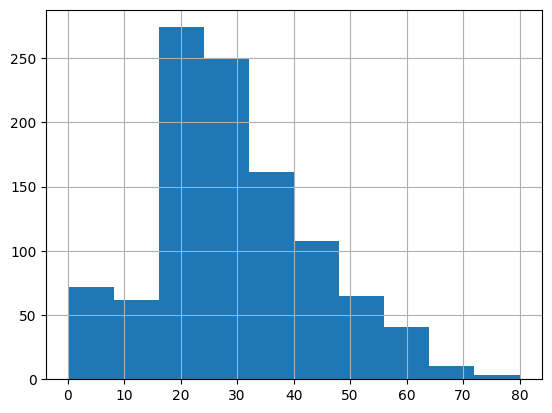

In [351]:
df_titanic['age'].hist()

32. Using `matplotlib` find the appropriate plot to visualize the column `'gender'`

([<matplotlib.patches.Wedge object at 0x000001E0A6961FD0>, <matplotlib.patches.Wedge object at 0x000001E0A67C0170>], [Text(-0.4808368388484557, 0.9893411617870878, 'male'), Text(0.48083668946209085, -0.9893412343914192, 'female')], [Text(-0.2622746393718849, 0.5396406337020478, '64.4%'), Text(0.2622745578884132, -0.5396406733044103, '35.6%')])


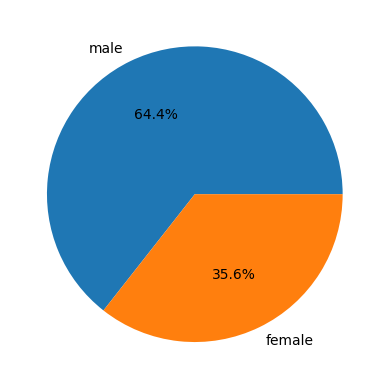

In [322]:

lab_32 = df_titanic['gender'].value_counts().index
size_32 = df_titanic['gender'].value_counts().values
print(plt.pie(size_32, labels=lab_32,autopct='%1.1f%%'))

32b. What if you also plot the column `'gender'` using the function [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the library [`seaborn`](https://seaborn.pydata.org/)?

Remember you have never used `seaborn` before, therefore you should install it before importing it.

<Axes: xlabel='count', ylabel='gender'>

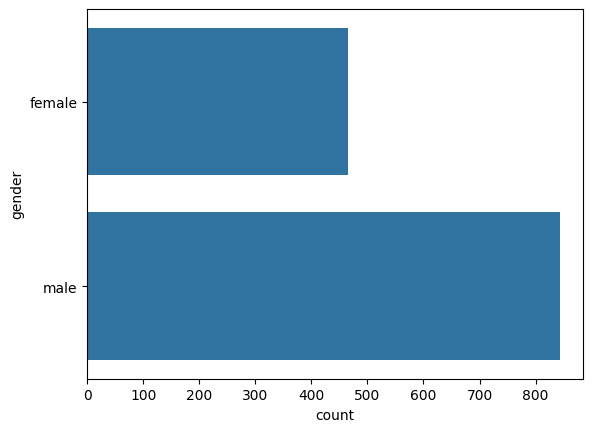

In [323]:
sns.countplot(df_titanic['gender'])

33. Using the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) from the library `seaborn`, find out if the hypothesis _"Women are more likely to survive shipwrecks"_ is true or not.

You should get something like this:

![catplot](./img/catplotgen.png)

En el Titanic, podemos ver que las mujeres tuvieron una tasa de mortalidad inferior a los hombres


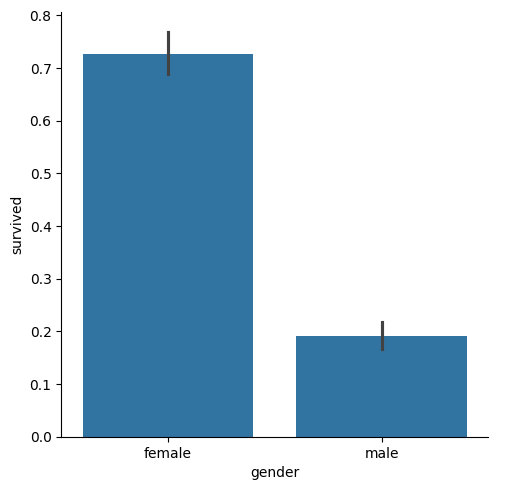

In [324]:
print(sns.catplot(df_titanic,x='gender',y='survived',kind='bar'))
print("En el Titanic, podemos ver que las mujeres tuvieron una tasa de mortalidad inferior a los hombres")

34. Using [`kdeplot`]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") from `seaborn` represent those who not survived distributed by age.<>

Hint: First you should "filter" the `titanic` dataset where the column "survived" is 0, indexing the column `"age"` only.

Arguments you should pass to the function: 

    - color = "red"
    - label = "Not Survived"
    - shade = True
    
You should get something like this: 

![kdeplot](./img/kdeplotsur.png)

<Axes: xlabel='age', ylabel='Density'>

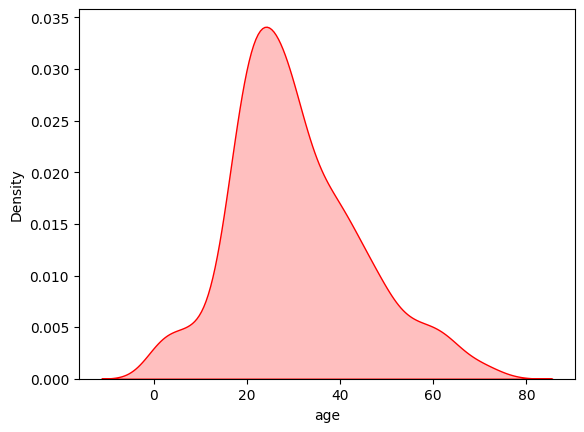

In [329]:
deaths_cond = df_titanic[df_titanic["survived"] == 0]
sns.kdeplot(deaths_cond,x="age",color='red',label='Not Survived',fill=True)
